# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

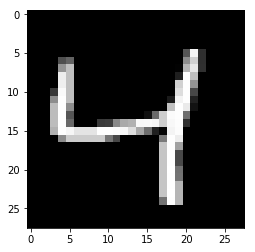

In [5]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [19]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=(None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, shape=(None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [20]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [21]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6924
Epoch: 1/20... Training loss: 0.6894
Epoch: 1/20... Training loss: 0.6857
Epoch: 1/20... Training loss: 0.6816
Epoch: 1/20... Training loss: 0.6765
Epoch: 1/20... Training loss: 0.6701
Epoch: 1/20... Training loss: 0.6625
Epoch: 1/20... Training loss: 0.6534
Epoch: 1/20... Training loss: 0.6428
Epoch: 1/20... Training loss: 0.6324
Epoch: 1/20... Training loss: 0.6173
Epoch: 1/20... Training loss: 0.6050
Epoch: 1/20... Training loss: 0.5918
Epoch: 1/20... Training loss: 0.5728
Epoch: 1/20... Training loss: 0.5547
Epoch: 1/20... Training loss: 0.5367
Epoch: 1/20... Training loss: 0.5184
Epoch: 1/20... Training loss: 0.4974
Epoch: 1/20... Training loss: 0.4810
Epoch: 1/20... Training loss: 0.4638
Epoch: 1/20... Training loss: 0.4477
Epoch: 1/20... Training loss: 0.4349
Epoch: 1/20... Training loss: 0.4153
Epoch: 1/20... Training loss: 0.4058
Epoch: 1/20... Training loss: 0.3860
Epoch: 1/20... Training loss: 0.3835
Epoch: 1/20... Training loss: 0.3688
E

Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1973
Epoch: 1/20... Training loss: 0.1989
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1951
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1984
Epoch: 1/20... Training loss: 0.1965
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1974
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1935
E

Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1607
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1620
Epoch: 2/20... Training loss: 0.1499
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1595
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1631
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1623
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1541
E

Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1406
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1384
E

Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1283
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1301
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1242
E

Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1133
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1130
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1125
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1141
E

Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1061
E

Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1119
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1063
E

Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1036
E

Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.0964
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0956
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.0983
E

Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0984
E

Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0944
E

Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0895
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0987
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0980
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0882
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0979
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0935
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0978
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0891
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0885
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0977
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

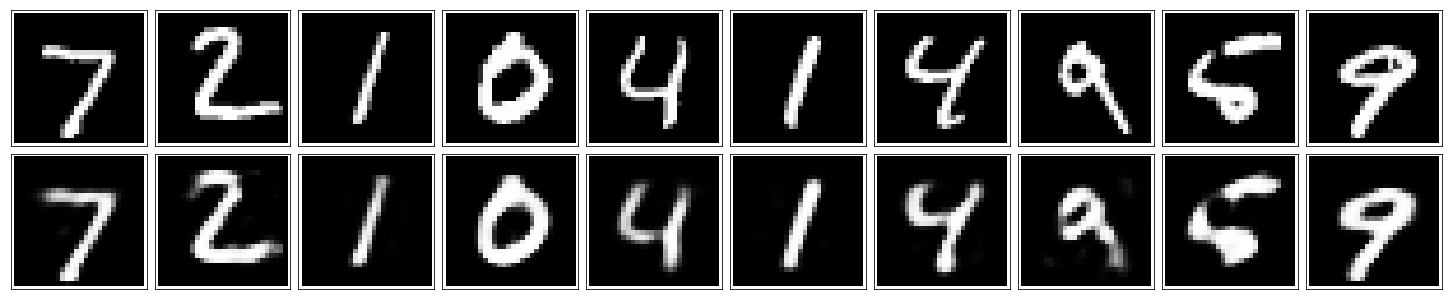

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [23]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.